# Airline Passenger Satisfaction Prediction ✈




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# About dataset

Measuring customer satisfaction is a key element for modern businesses as it can significantly contribute to a continuing effort of service quality improvement. In order to meet customer expectations and achieve higher quality levels, airlines need to develop a specific mechanism of passenger satisfaction measurement.

# Importing Necessart Packages(or Library )

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Listing The Directory item

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/project/airline_passenger_satisfaction.csv',nrows = 10000)
df

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Male,Loyal Customer,50,Business travel,Business,3599,3,3,3,...,5,5,5,5,5,5,4,12,24.0,satisfied
9996,9996,Male,Loyal Customer,38,Business travel,Business,3873,5,5,5,...,4,4,4,4,3,4,5,0,0.0,satisfied
9997,9997,Female,Loyal Customer,39,Business travel,Business,319,4,4,4,...,4,4,4,4,3,4,2,0,0.0,satisfied
9998,9998,Male,Loyal Customer,52,Business travel,Business,1363,5,5,5,...,4,4,3,4,5,4,5,1,11.0,satisfied


# Drop Colums

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df
#droping coloum(Unnamed: 0) since it does not contribute to accuracy

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Male,Loyal Customer,50,Business travel,Business,3599,3,3,3,3,...,5,5,5,5,5,5,4,12,24.0,satisfied
9996,Male,Loyal Customer,38,Business travel,Business,3873,5,5,5,5,...,4,4,4,4,3,4,5,0,0.0,satisfied
9997,Female,Loyal Customer,39,Business travel,Business,319,4,4,4,4,...,4,4,4,4,3,4,2,0,0.0,satisfied
9998,Male,Loyal Customer,52,Business travel,Business,1363,5,5,5,5,...,4,4,3,4,5,4,5,1,11.0,satisfied


# To Check The Missing Values

In [ ]:
df.isna().sum() #this dataset have 129880 rows and 23 columns

Gender                                0
customer_type                         0
age                                   0
type_of_travel                        0
customer_class                        0
flight_distance                       0
inflight_wifi_service                 0
departure_arrival_time_convenient     0
ease_of_online_booking                0
gate_location                         0
food_and_drink                        0
online_boarding                       0
seat_comfort                          0
inflight_entertainment                0
onboard_service                       0
leg_room_service                      0
baggage_handling                      0
checkin_service                       0
inflight_service                      0
cleanliness                           0
departure_delay_in_minutes            0
arrival_delay_in_minutes             26
satisfaction                          0
dtype: int64

# Filling Missing Values

In [ ]:
df['arrival_delay_in_minutes']=df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].mean()) #here coloum[arrival_delay_in_minutes] have missing value in it so the coloum should be filled

In [ ]:
df.isna().sum()

Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

# Shape OF The Dataset

In [ ]:
df.shape #this dataset have 129880 rows and 23 columns

(10000, 23)

To Check The Datatypes

In [ ]:
df.dtypes

Gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
customer_class                        object
flight_distance                        int64
inflight_wifi_service                  int64
departure_arrival_time_convenient      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
onboard_service                        int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
satisfacti

# Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder #In machine learning, label encoding is a technique used to convert categorical variables (variables that can take on a limited, fixed number of values) into numerical labels
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['customer_type']=le.fit_transform(df['customer_type'])
df['type_of_travel']=le.fit_transform(df['type_of_travel'])
df['customer_class']=le.fit_transform(df['customer_class'])
df['satisfaction']=le.fit_transform(df['satisfaction'])
df

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,50,0,0,3599,3,3,3,3,...,5,5,5,5,5,5,4,12,24.0,1
9996,1,0,38,0,0,3873,5,5,5,5,...,4,4,4,4,3,4,5,0,0.0,1
9997,0,0,39,0,0,319,4,4,4,4,...,4,4,4,4,3,4,2,0,0.0,1
9998,1,0,52,0,0,1363,5,5,5,5,...,4,4,3,4,5,4,5,1,11.0,1


# Separate X And Y

In [ ]:
#features (independent variables)
X=df.iloc[:,:-1] #By using this code, you are essentially creating a new DataFrame X that contains all the rows and all the columns from the original DataFrame df, except for the last column
X

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,50,0,0,3599,3,3,3,3,...,4,5,5,5,5,5,5,4,12,24.0
9996,1,0,38,0,0,3873,5,5,5,5,...,5,4,4,4,4,3,4,5,0,0.0
9997,0,0,39,0,0,319,4,4,4,4,...,4,4,4,4,4,3,4,2,0,0.0
9998,1,0,52,0,0,1363,5,5,5,5,...,5,4,4,3,4,5,4,5,1,11.0


In [ ]:
#target(dependent variable)
y=df.iloc[:,-1] #By using this code, you are selecting the last column of the DataFrame df and assigning it to the variable y
y

0       0
1       0
2       1
3       0
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: satisfaction, Length: 10000, dtype: int64

# Value Count

In [ ]:
y.value_counts() #Dataset is a imbalanced---An imbalanced dataset in the context of machine learning refers to a situation where the classes in the target variable (or output variable) are not represented equally.

0    5689
1    4311
Name: satisfaction, dtype: int64

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


# Visualization

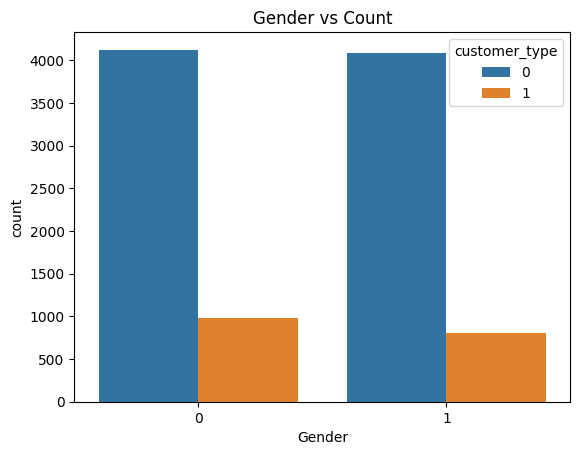

In [ ]:
plt.title('Gender vs Count')
sns.countplot(x='Gender',data=df,hue='customer_type') #to create a count plot based on the 'Gender' column from the DataFrame df. Additionally, it uses the 'customer_type' column to differentiate the count based on customer types.
plt.show()
 #from count plot it is clear that womens traveling (both Personal Travel and Business travel equally ) while men travels(have more Personal travel than Business travel)

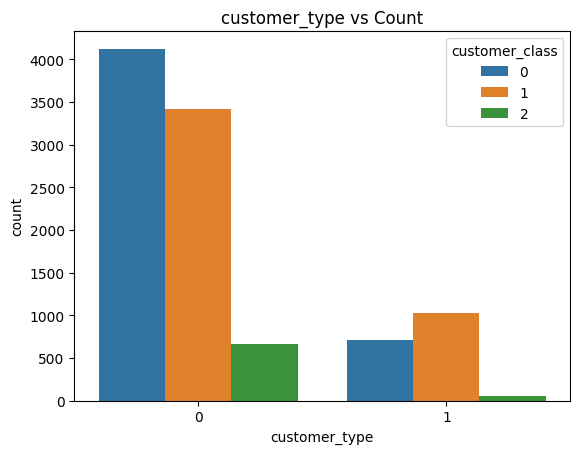

In [ ]:
plt.title('customer_type vs Count')
sns.countplot(x='customer_type',data=df,hue='customer_class')#It further differentiates the count based on the 'customer_class' column, using different colors to represent different 'customer_class' categories within each 'customer_type' category.
plt.show()

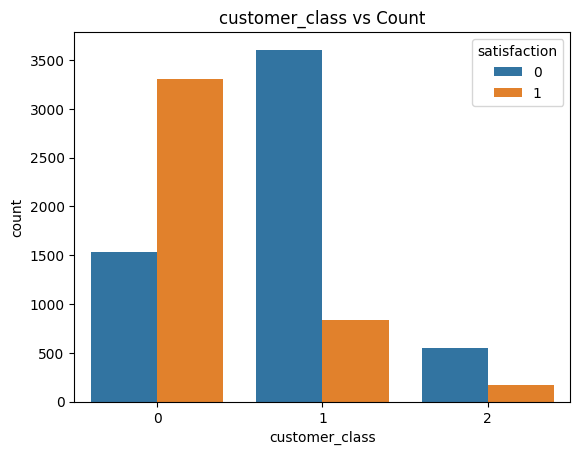

In [ ]:
plt.title('customer_class vs Count')
sns.countplot(x='customer_class',data=df,hue='satisfaction') #It further differentiates the count based on the 'customer_class' column using different colors for each 'customer_class' category within each 'customer_type' category.
plt.show()

# Dataset Scaling

In [ ]:
#scaling using Minmaxscaler,to learn the dataset and fit and transform the value in 0-1 range then stored to variable X
from sklearn.preprocessing import MinMaxScaler #The choice of scaling method depends on the characteristics of the dataset and the requirements of the machine learning algorithm being used.
scalar=MinMaxScaler()
X=scalar.fit_transform(X)
X

array([[1.00000000e+00, 0.00000000e+00, 7.69230769e-02, ...,
        1.00000000e+00, 1.91570881e-02, 1.40625000e-02],
       [1.00000000e+00, 1.00000000e+00, 2.30769231e-01, ...,
        2.00000000e-01, 7.66283525e-04, 4.68750000e-03],
       [0.00000000e+00, 0.00000000e+00, 2.43589744e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 4.10256410e-01, ...,
        4.00000000e-01, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 5.76923077e-01, ...,
        1.00000000e+00, 7.66283525e-04, 8.59375000e-03],
       [0.00000000e+00, 0.00000000e+00, 4.35897436e-01, ...,
        8.00000000e-01, 0.00000000e+00, 0.00000000e+00]])

# Train_Test_Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1) # Splitting the data into training and testing sets helps assess how well your model generalizes to unseen data and avoids overfitting by allowing you to evaluate its performance on data it has not seen during training.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Creating Classifier Instances

In [ ]:
knn=KNeighborsClassifier()
sv=SVC()
dtc=DecisionTreeClassifier()
Gnb=GaussianNB()
rfc=RandomForestClassifier()
adc=AdaBoostClassifier()

# Creating A Machine Learning Model

In [ ]:
lst=[knn,sv,dtc,Gnb,rfc,adc] #This loop allows you to quickly compare the performance of multiple classifiers on the test data, making it easier to assess which classifier performs better for your specific problem.
for i in lst:# It's a common practice in machine learning to try different algorithms and evaluate their performance to choose the best one for your particular task.
  print("*************",i,"**************")
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print('Accuracy score=',accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred)) #Prints the classification report, which includes metrics such as precision, recall, F1-score, and support, comparing the true labels (y_test) against the predicted labels (y_pred).
#The classification report provides a detailed summary of the model's performance for each class in the dataset.

************* KNeighborsClassifier() **************
Accuracy score= 90.93333333333334
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1735
           1       0.94      0.84      0.89      1265

    accuracy                           0.91      3000
   macro avg       0.91      0.90      0.91      3000
weighted avg       0.91      0.91      0.91      3000

************* SVC() **************
Accuracy score= 93.10000000000001
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1735
           1       0.93      0.90      0.92      1265

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000

************* DecisionTreeClassifier() **************
Accuracy score= 91.9
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1735
       

# Performance Evaluation

<function matplotlib.pyplot.show(close=None, block=None)>

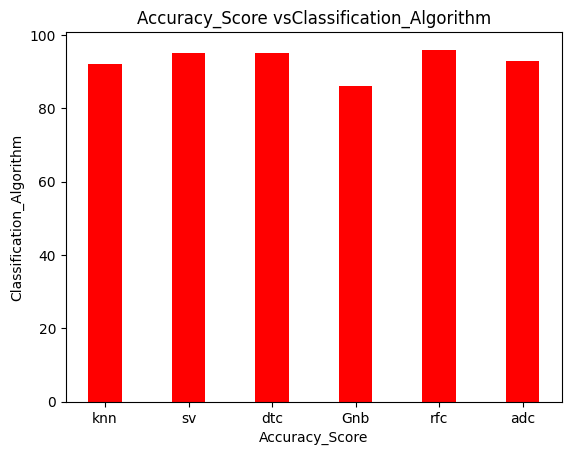

In [ ]:
x1=[92,95,95,86,96,93]
y1=['knn','sv','dtc','Gnb','rfc','adc']
plt.xlabel('Accuracy_Score')
plt.ylabel('Classification_Algorithm')
plt.title('Accuracy_Score vsClassification_Algorithm')
import matplotlib.pyplot as plt
plt.bar(y1,x1,width=0.4,color='red')
plt.show

from above evaluation Random forest classifier have best accuracy score while GaussianNB have worst accuracy

# Oversampling

In [ ]:
 #Oversampling is a technique used in the context of imbalanced datasets to balance the class distribution by increasing the number of instances in the minority class.
from imblearn. over_sampling import SMOTE #Imbalanced datasets occur when one class in a classification problem has significantly fewer instances than the other class(es), which can lead to biased or inaccurate models.
oversample=SMOTE(random_state=1)
X_os,y_os=oversample.fit_resample(X,y)

In [ ]:
#train_test_split
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

In [ ]:
knn_os=KNeighborsClassifier()
sv_os=SVC()
dtc_os=DecisionTreeClassifier()
Gnb_os=GaussianNB()
rfc_os=RandomForestClassifier()
adc_os=AdaBoostClassifier()

In [ ]:
lst=[knn_os,sv_os,dtc_os,Gnb_os,rfc_os,adc_os]
for i in lst:
  print("*************",i,"**************")
  i.fit(X_train_os,y_train_os)
  y_pred_os=i.predict(X_test_os)
  print('Accuracy score=',accuracy_score(y_test_os,y_pred_os)*100)
  print(classification_report(y_test_os,y_pred_os))


************* KNeighborsClassifier() **************
Accuracy score= 90.59753954305799
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1728
           1       0.92      0.88      0.90      1686

    accuracy                           0.91      3414
   macro avg       0.91      0.91      0.91      3414
weighted avg       0.91      0.91      0.91      3414

************* SVC() **************
Accuracy score= 92.29642647920328
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1728
           1       0.93      0.91      0.92      1686

    accuracy                           0.92      3414
   macro avg       0.92      0.92      0.92      3414
weighted avg       0.92      0.92      0.92      3414

************* DecisionTreeClassifier() **************
Accuracy score= 91.94493263034563
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     

# Performance Evaluation Of Oversampling

<function matplotlib.pyplot.show(close=None, block=None)>

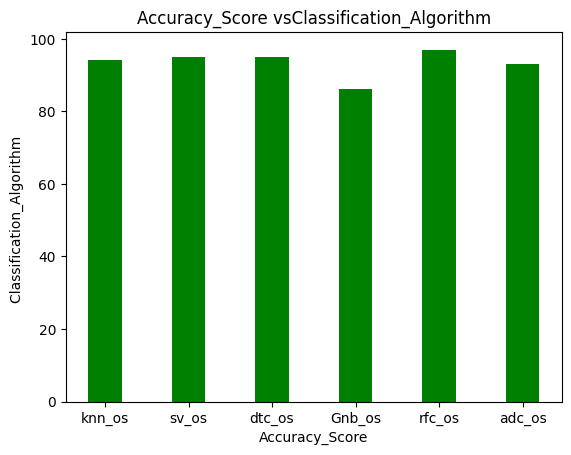

In [ ]:
x2=[94,95,95,86,97,93]
y2=['knn_os','sv_os','dtc_os','Gnb_os','rfc_os','adc_os']
plt.xlabel('Accuracy_Score')
plt.ylabel('Classification_Algorithm ')
plt.title('Accuracy_Score vsClassification_Algorithm')
import matplotlib.pyplot as plt
plt.bar(y2,x2,width=0.4,color='green')
plt.show

from above observation the Accuracy improves inKneighborsClassifier and RandomforestClassifier(here best accuracy  is in RandomForest classifier with 97 percentage

# Undersampling

In [ ]:
#Undersampling is a technique used in machine learning to address class imbalance in datasets. Unlike oversampling, which focuses on increasing the number of instances in the minority class, undersampling reduces the number of instances in the majority class.
from imblearn.under_sampling import RandomUnderSampler
Undersampler=RandomUnderSampler(random_state=1)
X_us,y_us=Undersampler.fit_resample(X,y)

In [ ]:
#train_test_split
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_us,y_us,test_size=0.3,random_state=1)

In [ ]:
knn_us=KNeighborsClassifier()
sv_us=SVC()
dtc_us=DecisionTreeClassifier()
Gnb_us=GaussianNB()
rfc_us=RandomForestClassifier()
adc_us=AdaBoostClassifier()

In [ ]:
lst=[knn_us,sv_us,dtc_us,Gnb_us,rfc_us,adc_us]
for i in lst:
  print("*************",i,"**************")
  i.fit(X_train_us,y_train_us)
  y_pred_us=i.predict(X_test_us)
  print('Accuracy score=',accuracy_score(y_test_us,y_pred_us)*100)
  print(classification_report(y_test_us,y_pred_us))

************* KNeighborsClassifier() **************
Accuracy score= 90.87746424429841
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1293
           1       0.95      0.87      0.90      1294

    accuracy                           0.91      2587
   macro avg       0.91      0.91      0.91      2587
weighted avg       0.91      0.91      0.91      2587

************* SVC() **************
Accuracy score= 92.92616930807885
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1293
           1       0.94      0.91      0.93      1294

    accuracy                           0.93      2587
   macro avg       0.93      0.93      0.93      2587
weighted avg       0.93      0.93      0.93      2587

************* DecisionTreeClassifier() **************
Accuracy score= 90.68419018167762
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     

# Performance Evaluation Of Undersampling

<function matplotlib.pyplot.show(close=None, block=None)>

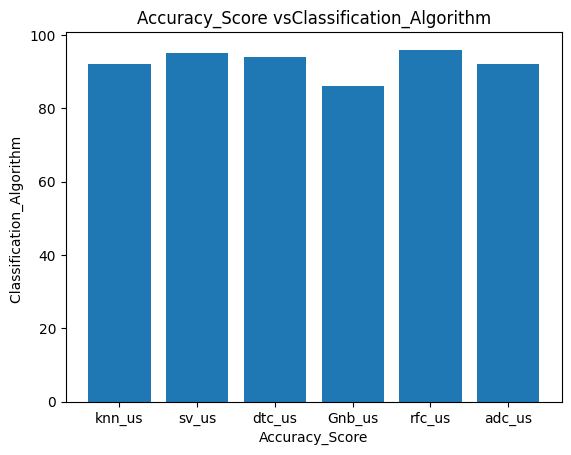

In [ ]:
x3=[92,95,94,86,96,92]
y3=['knn_us','sv_us','dtc_us','Gnb_us','rfc_us','adc_us']
plt.xlabel('Accuracy_Score')
plt.ylabel('Classification_Algorithm ')
plt.title('Accuracy_Score vsClassification_Algorithm')
plt.bar(y3,x3)
plt.show

from above observation there is no improvemt while compairing to oversampling

# Hyperparameter tuning

Hyperparameter tuning, also known as hyperparameter optimization, is the process of finding the best set of hyperparameters for a machine learning model to achieve optimal performance.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_estimators': [50, 100, 200, 300],  # This parameter defines the number of trees in the random forest
    'max_features': ['auto', 'sqrt', 'log2'],  # It determines the maximum number of features each tree in the forest should consider when looking for the best split
    'max_depth': [None, 10, 20, 30],  #  This parameter controls the maximum depth of each decision tree in the forest
    'min_samples_split': [2, 5, 10],  #  It defines the minimum number of samples required to split an internal node. If a node has fewer than this number of samples, it will not be split
    'min_samples_leaf': [1, 2, 4]  #  This parameter sets the minimum number of samples required to be at a leaf node
}
#Randomized SearchCV--It randomly samples combinations from this parameter grid and evaluates them using cross-validation to find the best set of hyperparameters for the random forest model

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=5, cv=5, n_jobs=-1, random_state=1)

# Fit the random search model
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=1)

In [ ]:
print(random_search.best_params_) #taking best parameters

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [ ]:
tuned_rf_classifier = RandomForestClassifier(n_estimators=200, min_samples_split= 5,max_features= 'sqrt', min_samples_leaf= 1, max_depth= 30)
tuned_rf_classifier.fit(X_train,y_train)
y_pred_new= tuned_rf_classifier.predict(X_test)
y_pred_new

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
print('Accuracy score=',accuracy_score(y_test_os,y_pred_os)*100)
print(classification_report(y_test_os,y_pred_os))

Accuracy score= 92.3842999414177
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1728
           1       0.93      0.91      0.92      1686

    accuracy                           0.92      3414
   macro avg       0.92      0.92      0.92      3414
weighted avg       0.92      0.92      0.92      3414



Best Perfoming Model

In [ ]:
rfc_os = RandomForestClassifier()
rfc_os.fit(X_train_os,y_train_os)
y_pred_os=rfc_os.predict(X_test_os)
print('Accuracy score=',accuracy_score(y_test_os,y_pred_os)*100)
print(classification_report(y_test_os,y_pred_os))


Accuracy score= 94.63971880492092
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1728
           1       0.95      0.94      0.95      1686

    accuracy                           0.95      3414
   macro avg       0.95      0.95      0.95      3414
weighted avg       0.95      0.95      0.95      3414



In [ ]:
y_new=rfc_os.predict(scalar.transform([[1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0]]))
y_new

array([0])

# **Conclusion**

from above observation it is noted that randomforest classfier with oversampling have maximum accuracy,precision,f1-score and recall,while doing under sampling and hyperparameter tunning there is no improvement in above mentioned perfomace  parameters

In [ ]:
import pickle
import joblib

In [ ]:
filename = 'scalar.pkl'
pickle.dump(scalar,open('scalar.pkl','wb'))

In [ ]:
filename = 'classifier.pkl'
pickle.dump(rfc_os,open('classifier.pkl','wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('classifier.pkl','rb'))

In [ ]:
#loading the scaler
load_scalar = pickle.load(open('scalar.pkl','rb'))

In [ ]:
import numpy as np

In [ ]:
# input_data = (1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0)

# #changeibg input data into numpy array
# input_np = np.asarray(input_data)

# #reshapeing the array as we are predicting for one instance
# input_np_reshaped = input_np.reshape(1,-1)

# y_pred = loaded_model.predict(input_np_reshaped)
# print(y_pred)

# if (y_pred[0] == 0):
#   print('Not satisfied')
# else:
#   print('Satisfied')

In [ ]:
!pip install streamlit -q

In [ ]:
!pip install streamlit

In [ ]:
!wget -q -O - - ipv4.icanhazip.com

35.196.210.177


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] | fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.210.177:8501

npx: installed 22 in 2.577s
your url is: https://eleven-waves-stop.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
  Stopping...
^C
